In [ ]:
  #!pip install tensorflow
#!pip install tensorflow tensorflow_decision_forests

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 28.2 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
import tensorflow_decision_forests as tfdf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Comment this if the data visualisations doesn't work on your side
%matplotlib inline

print("done")

done


In [ ]:
train_file_path = "/content/drive/MyDrive/Indian House Prices.csv"
data = pd.read_csv(train_file_path)
print("Full train dataset shape is {}".format(data.shape))

Full train dataset shape is (9390, 44)


In [ ]:
data.head()

,Unnamed: 0,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,...,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator,City,Latitude,Longitude
0,0,300.00,3340,JP Nagar Phase 1,4.0,0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Banglore,12.265594,76.646540
1,1,83.58,1675,Doddanekundi,3.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Banglore,12.971319,77.696477
2,2,68.45,1670,Kengeri,3.0,0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Banglore,12.917657,77.483757
3,3,67.97,1220,Horamavu,2.0,0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Banglore,13.027331,77.660151
4,4,200.00,2502,Thanisandra,4.0,0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Banglore,13.054713,77.633926


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9390 entries, 0 to 9389
Data columns (total 44 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           9390 non-null   int64  
 1   Price                9390 non-null   float64
 2   Area                 9390 non-null   int64  
 3   Location             9390 non-null   object 
 4   No. of Bedrooms      9390 non-null   float64
 5   Resale               9390 non-null   int64  
 6   MaintenanceStaff     9390 non-null   float64
 7   Gymnasium            9390 non-null   float64
 8   SwimmingPool         9390 non-null   float64
 9   LandscapedGardens    9390 non-null   float64
 10  JoggingTrack         9390 non-null   float64
 11  RainWaterHarvesting  9390 non-null   float64
 12  IndoorGames          9390 non-null   float64
 13  ShoppingMall         9390 non-null   float64
 14  Intercom             9390 non-null   float64
 15  SportsFacility       9390 non-null   f

count    9390.000000
mean      105.614563
std       139.664066
min        20.000000
25%        45.000000
50%        70.000000
75%       122.000000
max      4000.000000
Name: Price, dtype: float64


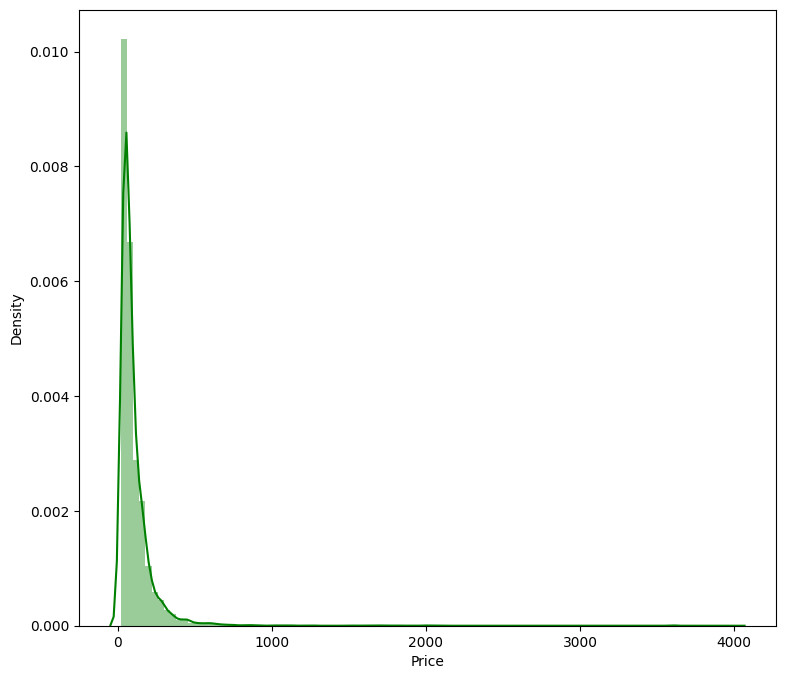

In [ ]:
print(data['Price'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(data['Price'], color='g', bins=100, hist_kws={'alpha': 0.4});

**Numerical data distribution of the dataset**

In [ ]:
list(set(data.dtypes.tolist()))

[dtype('int64'), dtype('float64'), dtype('O')]

In [ ]:
df_num = data.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,Unnamed: 0,Price,Area,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator,Latitude,Longitude
0,0,300.00,3340,4.0,0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.265594,76.646540
1,1,83.58,1675,3.0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.971319,77.696477
2,2,68.45,1670,3.0,0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.917657,77.483757
3,3,67.97,1220,2.0,0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.027331,77.660151
4,4,200.00,2502,4.0,0,0.0,1.0,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.054713,77.633926


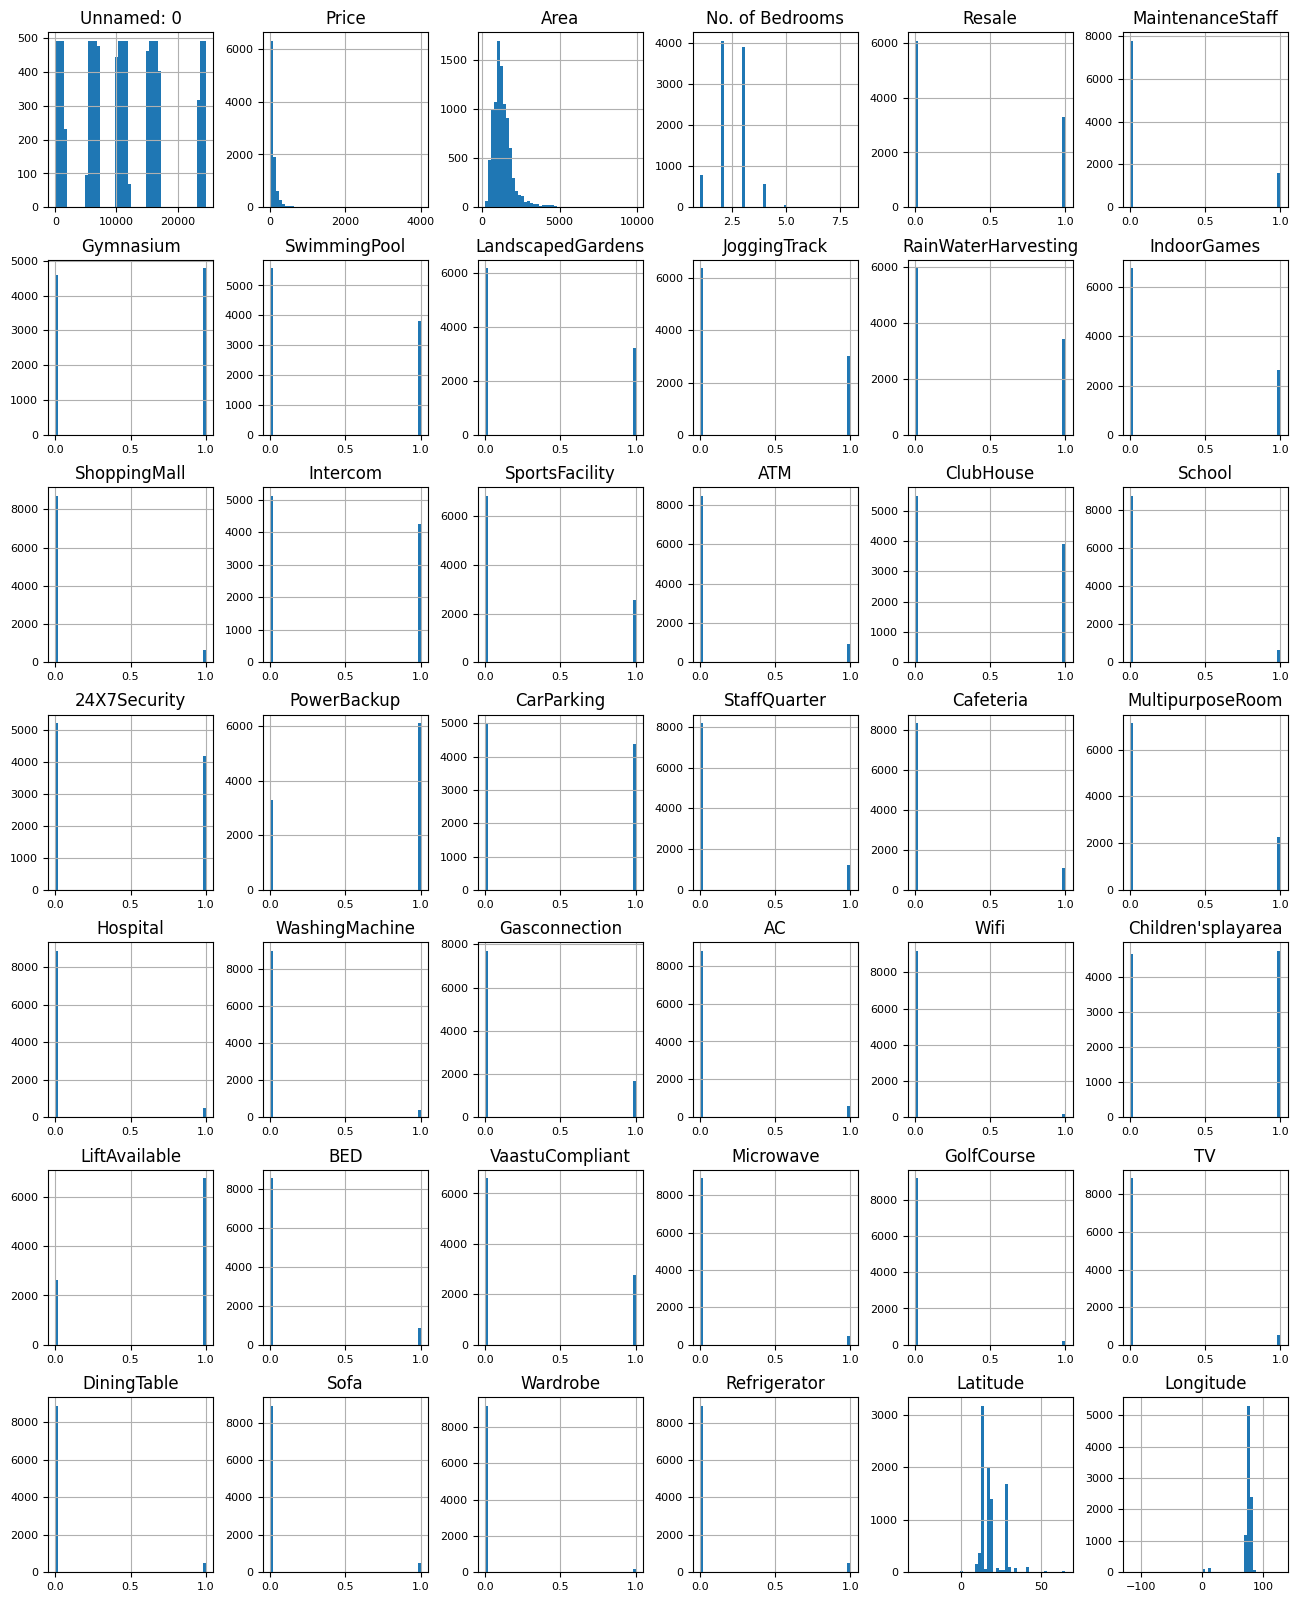

In [ ]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

**Prepare the dataset**

In [ ]:
import numpy as np

def split_dataset(dataset, test_ratio=0.30):
  test_indices = np.random.rand(len(dataset)) < test_ratio
  return dataset[~test_indices], dataset[test_indices]

train_ds_pd, valid_ds_pd = split_dataset(data)
print("{} examples in training, {} examples in testing.".format(
    len(train_ds_pd), len(valid_ds_pd)))

6667 examples in training, 2723 examples in testing.


In [ ]:
import warnings
warnings.filterwarnings("ignore")
label = 'Price'
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_ds_pd, label=label, task = tfdf.keras.Task.REGRESSION)
valid_ds = tfdf.keras.pd_dataframe_to_tf_dataset(valid_ds_pd, label=label, task = tfdf.keras.Task.REGRESSION)

**Create a Random Forest**

In [ ]:
rf = tfdf.keras.RandomForestModel(task = tfdf.keras.Task.REGRESSION)
rf.compile(metrics=["mse"]) # Optional, you can use this to include a list of eval metrics

Use /tmp/tmpfgqg0275 as temporary training directory


**Train the model**

In [ ]:
import warnings

warnings.filterwarnings("ignore")

rf.fit(x=train_ds)

Reading training dataset...
Training dataset read in 0:00:09.647446. Found 6667 examples.
Training model...
Model trained in 0:00:19.843983
Compiling model...


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Model compiled.


**Data** **visualization**

In [ ]:
tfdf.model_plotter.plot_model_in_colab(rf, tree_idx=0, max_depth=3)

**Root mean square error**

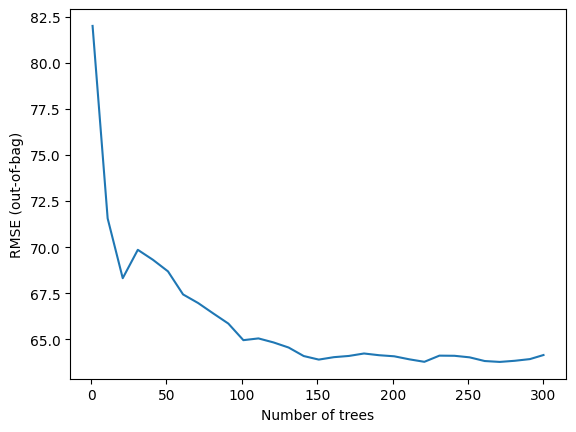

In [ ]:
import matplotlib.pyplot as plt
logs = rf.make_inspector().training_logs()
plt.plot([log.num_trees for log in logs], [log.evaluation.rmse for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("RMSE (out-of-bag)")
plt.show()

In [ ]:
import pandas as pd

test_file_path = "/content/drive/MyDrive/Indian House Prices.csv"
test_data = pd.read_csv(test_file_path)
ids = test_data.pop('Location')
ids1 = test_data.pop('No. of Bedrooms')
ids3 = test_data.pop('Price')
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(
    test_data,
    task = tfdf.keras.Task.REGRESSION)

#preds = rf.predict(test_data)
output = pd.DataFrame({ 'Location' : ids ,'No. of Bedrooms':ids1,
                       'Price': ids3})

output

,Location,No. of Bedrooms,Price
0,JP Nagar Phase 1,4.0,300.00
1,Doddanekundi,3.0,83.58
2,Kengeri,3.0,68.45
3,Horamavu,2.0,67.97
4,Thanisandra,4.0,200.00
...,...,...,...
9385,Worli,3.0,620.00
9386,Virar East,1.0,25.00
9387,Belapur,3.0,190.00
9388,Airoli,2.0,149.00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
